# Estádistica en Julia
Tener una comprensión sólida de las estadísticas en ciencia de datos nos permite comprender mejor nuestros datos y nos permite crear una evaluación cuantificable de cualquier conclusión futura.

In [1]:
# Configurando nuestro manipulador de paquetes
using Pkg;

In [3]:
#Importando los paquetes necesarios
Pkg.add("Statistics")
Pkg.add("StatsBase")
Pkg.add("RDatasets")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("KernelDensity")
Pkg.add("Distributions")
Pkg.add("LinearAlgebra")
Pkg.add("HypothesisTests")
Pkg.add("PyCall")
Pkg.add("MLBase")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


In [4]:
#Preprando para usar los paquetes importados
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

En este cuaderno, utilizaremos datos de erupción en el **faithful geyser.** Los datos contendrán tiempos de espera entre cada vez consecutiva que el **geyser** se apaga y la duración de las erupciones.

# Obteniendo nuestros datos

In [6]:
D = dataset("datasets","faithful")
@show names(D)
first(D, 5)

names(D) = [:Eruptions, :Waiting]


,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85


In [7]:
#Obteniendo los resultados de estádistica descriptiva
describe(D)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,,,Float64
2,Waiting,70.8971,43,76.0,96,,,Int64


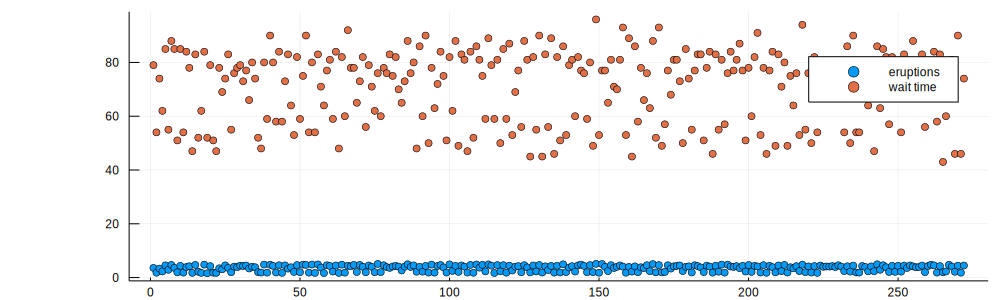

In [15]:
#Obteniendo los valores de erupciones
eruptions = D[!,:Eruptions]
#Grafica de dispersión de los datos
scatter(eruptions,label="eruptions")
#Obteniendo el tiempo de espera
waittime = D[!,:Waiting]
#Grafica de dispersión de los datos se usa ! para tener como resultado en la misma gráfica
scatter!(waittime,label="wait time", size=(1000,300))

# Gráficos estadísticos
Como puede ver, esto no nos dice mucho acerca de los datos ... Probemos algunos gráficos estadísticos

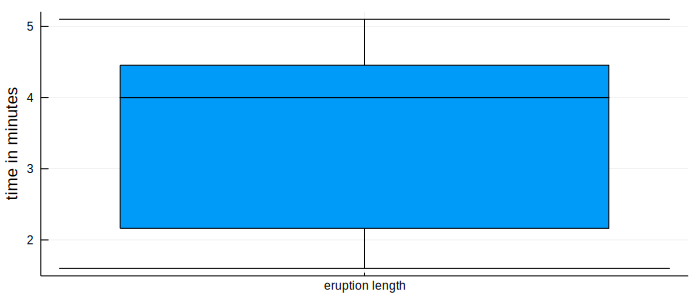

In [20]:
boxplot(["eruption length"],eruptions,legend=false,size=(700,300),whisker_width=1,ylabel="time in minutes")

Las gráficas estadísticas, como una gráfica de caja y una gráfica de violín, pueden proporcionar una comprensión mucho mejor de los datos. Aquí, vemos de inmediato que el tiempo medio de cada erupción es de aproximadamente 4 minutos.

La siguiente gráfica que veremos es una gráfica de histograma.

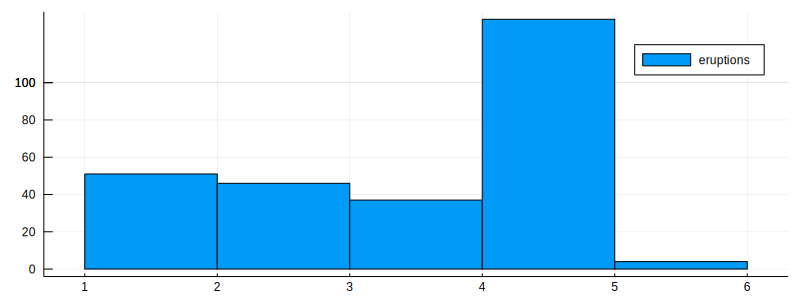

In [31]:
histogram(eruptions,label="eruptions", size=(800,300))

Puede ajustar el número de contenedores manualmente o pasando una de las funciones de autobinning.

In [25]:
?histogram

search: histogram histogram! Histogram histogram2d histogram2d! ea_histogram



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


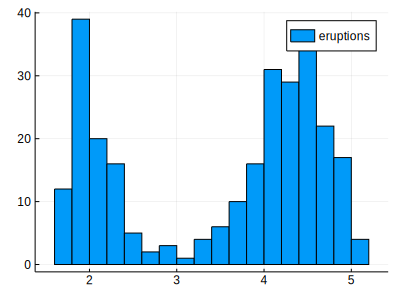

In [33]:
histogram(eruptions,bins=:sqrt,label="eruptions", size=(400,300))

# Estimaciones de densidad del núcleo

A continuación, veremos cómo podemos ajustar una función de estimación de densidad del núcleo a nuestros datos. Haremos uso del paquete `KernelDensity.jl.`

In [53]:
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794627968e-5, 1.1743789689280804e-5, 1.1911063348919726e-5, 1.209573105311057e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627800858e-5, 1.113759304488017e-5, 1.1076192604058191e-5, 1.1030781609218734e-5, 1.1001338720907292e-5, 1.0987860983071793e-5, 1.0990363864659541e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

Si queremos que el histograma y el gráfico de densidad del núcleo estén alineados, debemos recordar que la "contribución de densidad" de cada punto agregado a uno de estos histogramas es 1 / (nb de elementos) * ancho de bin. Lea más sobre las estimaciones de densidad del kernel en su página de wikipedia https://en.wikipedia.org/wiki/Kernel_density_estimation

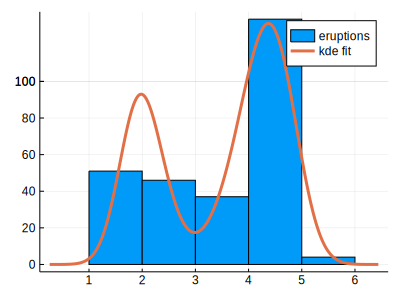

In [54]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit", size=(400,300)) # nb of elements*bin width

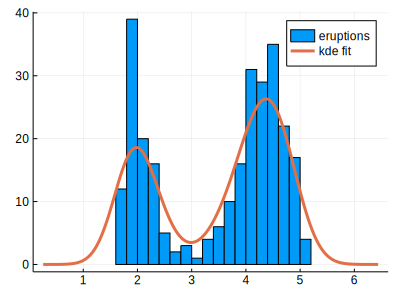

In [55]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit",size=(400,300)) # nb of elements*bin width

A continuación, veremos una distribución de probabilidad, es decir, la distribución normal y verificaremos que genera una curva de campana.

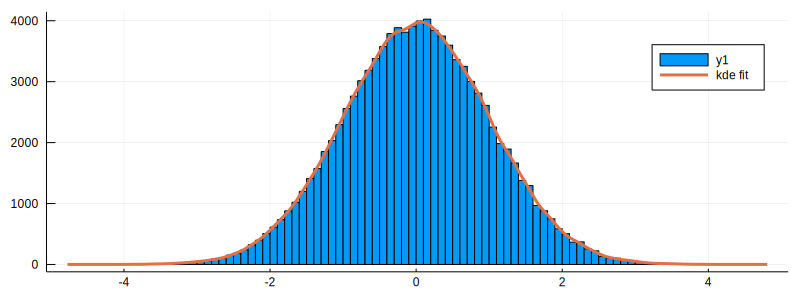

In [56]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit", size=(800,300)) # nb of elements*bin width

# Distribuciones de probabilidad
Otra forma de generar el mismo gráfico es mediante el uso del paquete de Distribuciones y eligiendo la distribución de probabilidad que desee, y luego extrayendo números aleatorios del mismo. Como ejemplo, usaremos `d = Normal ()` a continuación.

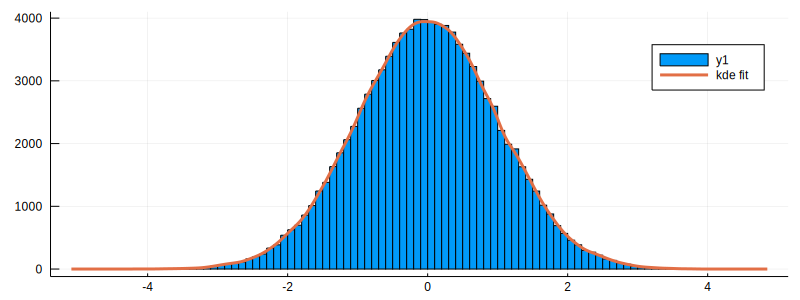

In [57]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit", size=(800,300)) # nb of elements*bin width

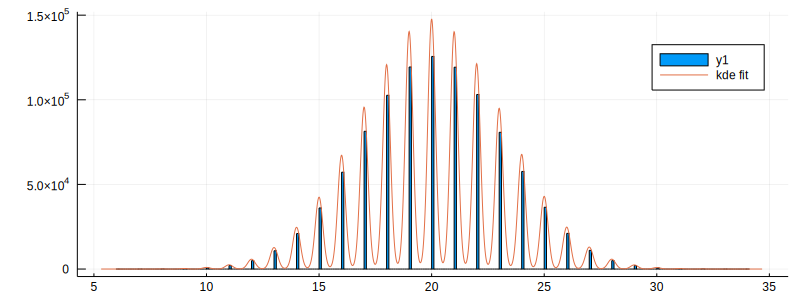

In [58]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit", size=(800,300)) # nb of elements*bin width

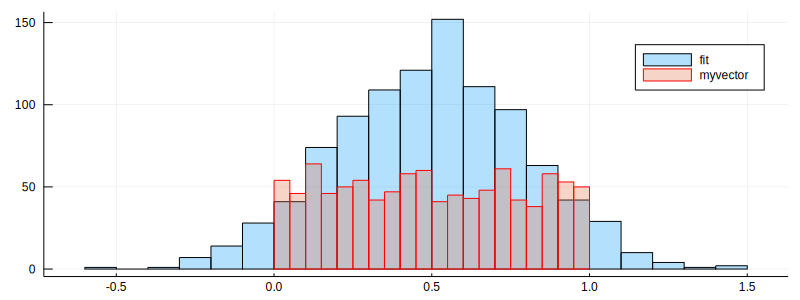

In [59]:
# A continuación, intentaremos ajustar un conjunto dado de números a una distribución.
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector", size=(800,300))

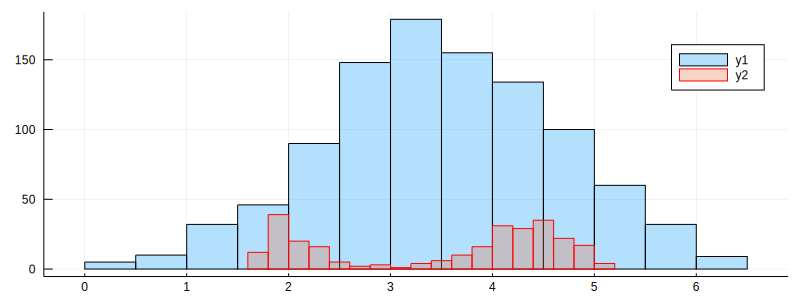

In [61]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,size=(800,300))

# Hypothesis testing
A continuación, realizaremos pruebas de hipótesis utilizando el paquete HypothesisTests.jl.

In [62]:
?OneSampleTTest

search: OneSampleTTest OneSampleHotellingT2Test OneSampleZTest OneSampleADTest



```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)


In [63]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.01178781036710517
    95% confidence interval: (-0.0739, 0.0504)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7098

Details:
    number of observations:   1000
    t-statistic:              -0.37218515779913824
    degrees of freedom:       999
    empirical standard error: 0.03167189803271748


In [64]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.4877830882352936
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


Una nota sobre los valores p: actualmente se usa el valor p de la correlación Spearman y Pearson de Python. Pero puede seguir la fórmula aquí para implementar la suya. https://stackoverflow.com/questions/53345724/how-to-use-julia-to-compute-the-pearson-correlation-coefficient-with-p-value

In [66]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.989541990656138e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.900811168321813, 8.129958506616769e-100)


(0.900811168321813, 8.129958506616769e-100)

In [67]:
scipy_stats.pearsonr(eruptions,waittime)

(0.900811168321813, 8.129958506616769e-100)

In [68]:
corspearman(eruptions,waittime)

0.7779720576516121

In [69]:
cor(eruptions,waittime)

0.900811168321813

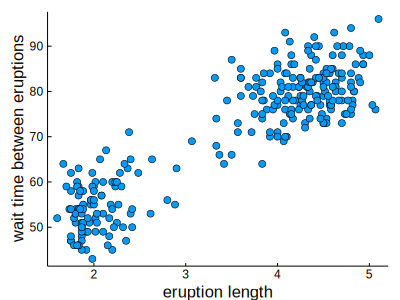

In [70]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

¡Interesante! Esto significa que la próxima vez que visite la parte de Yellowstone National para ver al géiser fiel y tenga que esperar demasiado para que se active, ¡es probable que tenga una erupción más larga!

# AUC and Confusion matrix
Finalmente, cubriremos las herramientas básicas que necesitará, como las puntuaciones de AUC o la matriz de confusión. Usamos el paquete MLBase para eso.

In [71]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

2×2 Array{Int64,2}:
 5  2
 1  0

In [72]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334

** Si va al parque nacional de Yellowstone y descubre que el viejo géiser fiel está tardando demasiado en entrar en erupción, entonces la espera podría valer la pena porque es probable que experimente una erupción más larga (es decir, parece haber una alta correlación entre el tiempo de espera y tiempo de erupción). **